# <b>Imports</b>

In [1]:
# Data Manipulation, Linear Algebra
import pandas as pd
import numpy as np

# Plots
import dabl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn import ensemble, tree, linear_model
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import tensorflow as tf
from tensorflow import keras

# Ignore Warning Messages 
import warnings
warnings.filterwarnings('ignore')

# <b>Preprocessing</b>

## <b>Getting the Data</b>

In [2]:
data = pd.read_csv("fetal_health.csv")
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## <b>Basic Analysis</b>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [5]:
data.describe(include="all")

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## <b>Checking for Null Values</b>

In [6]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# <b>EDA</b>

Target looks like classification
Linear Discriminant Analysis training set score: 0.739


[[<Figure size 1440x864 with 20 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 288x288 with 1 Axes>],
 None]

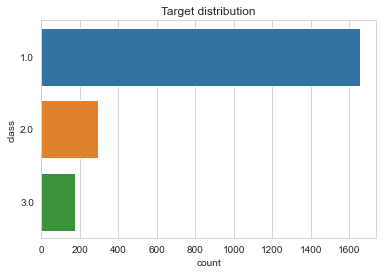

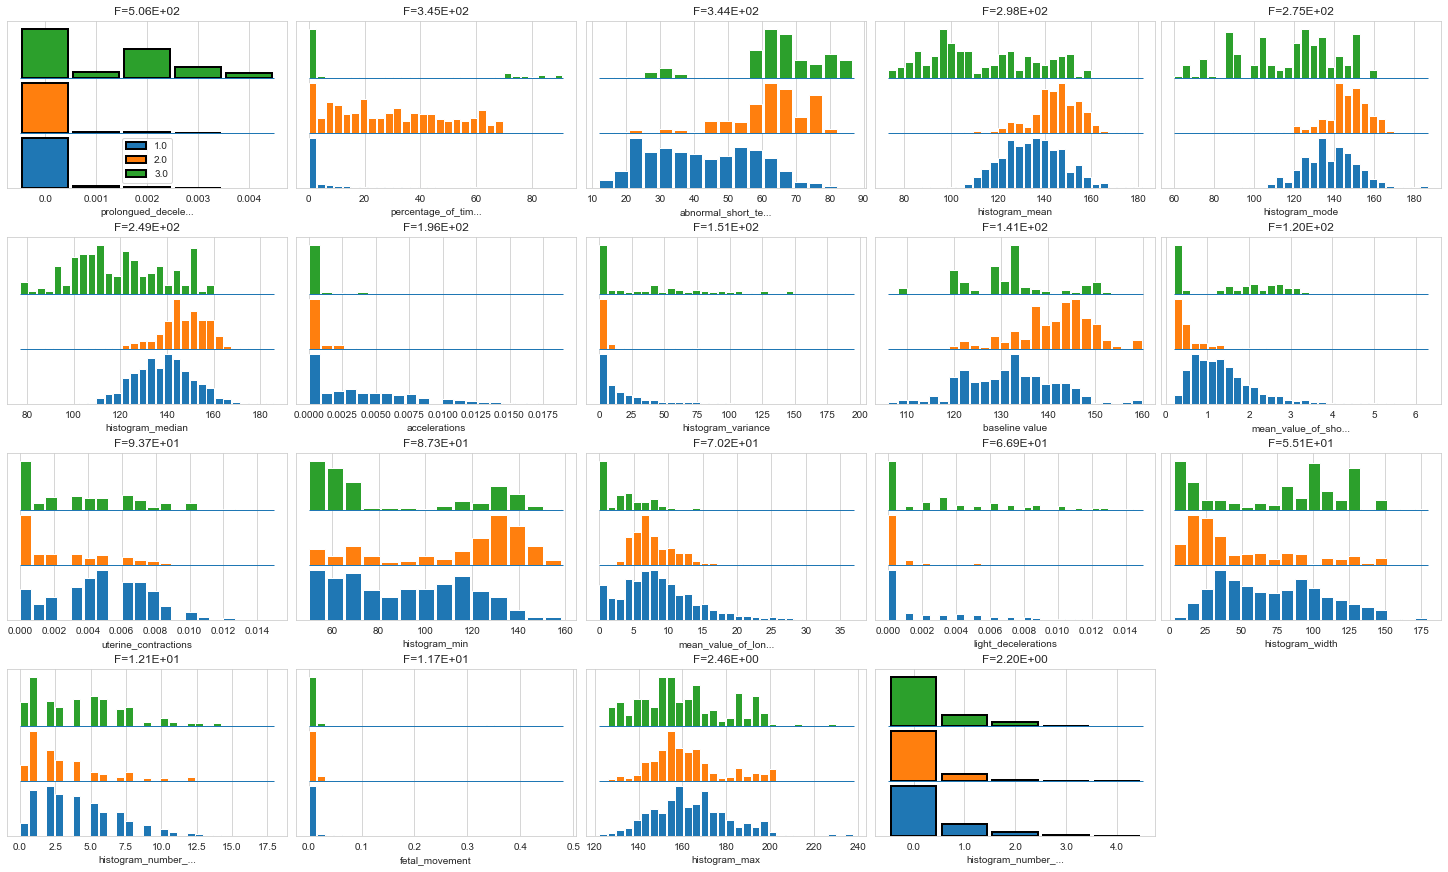

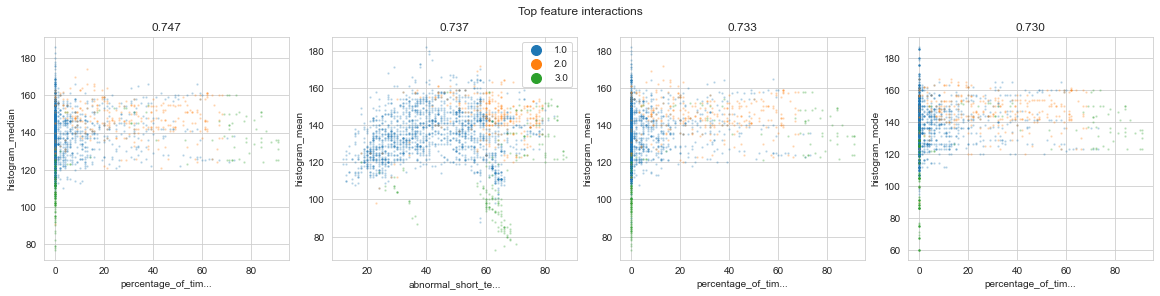

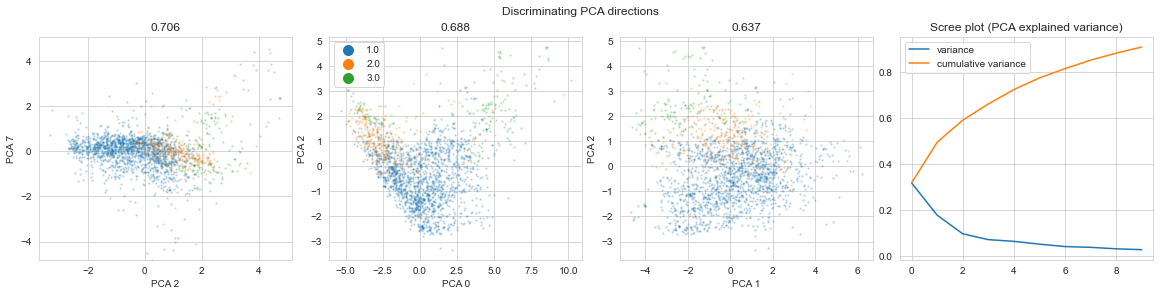

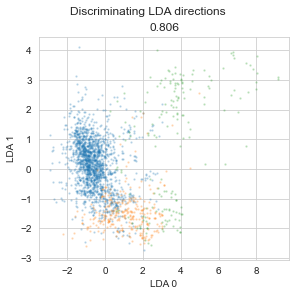

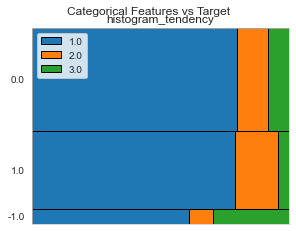

In [7]:
dabl.plot(data, "fetal_health")

<AxesSubplot:>

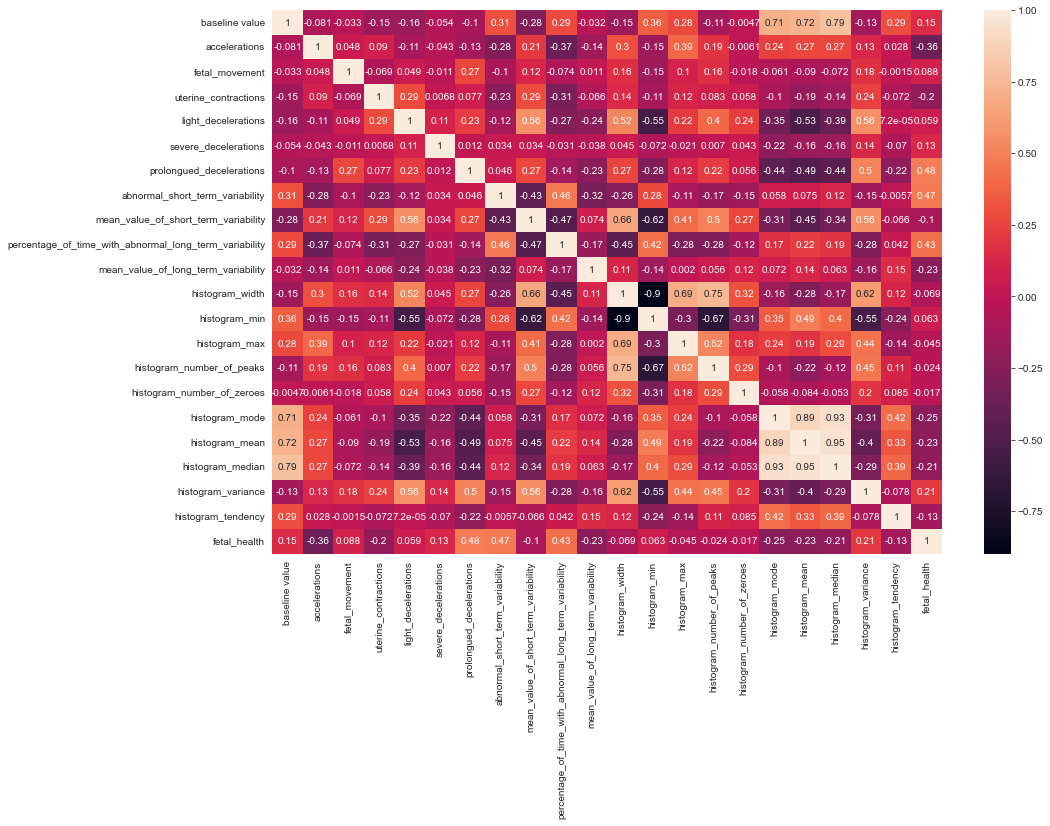

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

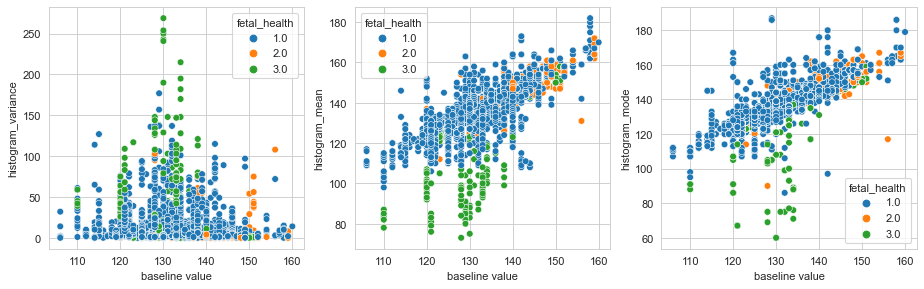

In [9]:
plt.figure(figsize=(14, 4), dpi=80)

y_cols = ["histogram_variance", "histogram_mean", "histogram_mode"]

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=data, x="baseline value", y=y_cols[i], hue="fetal_health", palette="tab10")

plt.show()

# <b>Preparing Data</b>

In [10]:
# Seperating Target Variables from Features
X = data.drop("fetal_health", axis=1)
y = data["fetal_health"]

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((1700, 21), (426, 21))

In [12]:
# Scaling the Data
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
X_train_scaled

array([[-3.29532259e-01, -5.41889749e-02, -2.02473170e-01, ...,
        -2.81541515e-01, -5.08270451e-01,  1.12419034e+00],
       [ 8.04237163e-02,  2.50473484e+00, -7.46191284e-02, ...,
         1.05166343e+00,  4.14943387e-01,  1.12419034e+00],
       [-1.96935616e+00,  1.99295008e+00, -2.02473170e-01, ...,
         6.30651342e-01,  1.57750896e+00, -5.13447686e-01],
       ...,
       [-3.29532259e-01,  1.48116531e+00, -2.02473170e-01, ...,
        -8.66789592e-04, -5.76656661e-01, -5.13447686e-01],
       [ 6.95357679e-01, -8.21866119e-01, -1.17237142e-01, ...,
         1.39470573e-01,  1.07205441e-01,  1.12419034e+00],
       [-1.86686716e+00, -3.10081356e-01, -2.02473170e-01, ...,
        -1.19373437e+00, -4.74077346e-01, -5.13447686e-01]])

In [14]:
X_test_scaled

array([[-5.34510246e-01, -8.21866119e-01, -5.33101215e-02, ...,
        -7.02553602e-01,  1.75591652e-01, -5.13447686e-01],
       [ 1.82912710e-01, -8.21866119e-01,  7.45439202e-02, ...,
        -7.10354709e-02, -6.45042871e-01, -5.13447686e-01],
       [-1.76437817e+00, -3.10081356e-01,  6.07269094e-01, ...,
        -7.72722284e-01, -3.37304925e-01,  1.12419034e+00],
       ...,
       [-4.32021252e-01,  7.13488169e-01,  1.59779948e-01, ...,
        -8.66789592e-04, -2.68918715e-01, -5.13447686e-01],
       [-5.34510246e-01,  2.50473484e+00, -2.02473170e-01, ...,
         1.75335024e+00,  4.03941253e+00,  1.12419034e+00],
       [-8.41977227e-01, -8.21866119e-01, -2.02473170e-01, ...,
        -1.54457778e+00, -3.71498030e-01, -5.13447686e-01]])

# <b>Model</b>

In [15]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test_scaled)
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

        print(MLA_name, "Done")
        row_index+=1

In [16]:
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.SGDClassifier(),
    linear_model.LogisticRegression(),

    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    XGBClassifier(eval_metric="mlogloss"),
    CatBoostClassifier(silent=True)  
]

MLA_testing(MLA=MLA, X_train=X_train_scaled, X_test=X_test)

GradientBoostingClassifier Done
RandomForestClassifier Done
SGDClassifier Done
LogisticRegression Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
XGBClassifier Done
CatBoostClassifier Done


In [17]:
MLA_compare = MLA_compare.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,GradientBoostingClassifier,94.835681,94.941176
1,XGBClassifier,94.835681,95.117647
2,CatBoostClassifier,94.835681,94.764706
3,RandomForestClassifier,94.600939,93.882353
4,DecisionTreeClassifier,91.079812,91.647059
5,LogisticRegression,90.610329,89.117647
6,SGDClassifier,89.671362,88.235294
7,ExtraTreeClassifier,88.262911,87.470588


## <b>ANN Model</b>

In [18]:
# OneHotEncoding Target Variable
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

In [19]:
ann_classifier = keras.Sequential([
    # Input Layer
    keras.layers.Dense(20, input_shape=X_train_scaled[0].shape, activation="relu", kernel_initializer="HeNormal"),
    
    # Hidden Layer 1
    keras.layers.Dense(40,activation="relu"),
    keras.layers.Dense(80,activation="relu"),
    keras.layers.Dropout(0.3),
    
    # Hidden Layer 2
    keras.layers.Dense(160,activation="relu"),
    keras.layers.Dense(320,activation="relu"),
    keras.layers.Dropout(0.3),
    
    # Hidden Layer 3
    keras.layers.Dense(640,activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

ann_classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 40)                840       
                                                                 
 dense_2 (Dense)             (None, 80)                3280      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 160)               12960     
                                                                 
 dense_4 (Dense)             (None, 320)               51520     
                                                                 
 dropout_1 (Dropout)         (None, 320)               0

In [20]:
ann_classifier.compile(loss="categorical_crossentropy", metrics="accuracy", optimizer="rmsprop")

history = ann_classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded),
                             epochs=100)

Epoch 1/100
54/54 [==============================] - 9s 27ms/step - loss: 0.5472 - accuracy: 0.7971 - val_loss: 0.3576 - val_accuracy: 0.8498
Epoch 2/100
54/54 [==============================] - 1s 12ms/step - loss: 0.3666 - accuracy: 0.8482 - val_loss: 0.3472 - val_accuracy: 0.8239
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.3109 - accuracy: 0.8688 - val_loss: 0.3701 - val_accuracy: 0.8568
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.8776 - val_loss: 0.2655 - val_accuracy: 0.8685
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.2733 - accuracy: 0.8782 - val_loss: 0.2438 - val_accuracy: 0.8967
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.2420 - accuracy: 0.8882 - val_loss: 0.2486 - val_accuracy: 0.8826
Epoch 7/100
54/54 [==============================] - 0s 9ms/step - loss: 0.2429 - accuracy: 0.8929 - val_loss: 0.2238 - val_accuracy: 0.9014
Epoch 8/10

54/54 [==============================] - 0s 8ms/step - loss: 0.0884 - accuracy: 0.9688 - val_loss: 0.5662 - val_accuracy: 0.9319
Epoch 59/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0837 - accuracy: 0.9729 - val_loss: 0.6040 - val_accuracy: 0.9108
Epoch 60/100
54/54 [==============================] - 0s 8ms/step - loss: 0.1052 - accuracy: 0.9724 - val_loss: 0.5492 - val_accuracy: 0.9272
Epoch 61/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0981 - accuracy: 0.9676 - val_loss: 0.4458 - val_accuracy: 0.9202
Epoch 62/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0701 - accuracy: 0.9759 - val_loss: 0.5702 - val_accuracy: 0.9225
Epoch 63/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0761 - accuracy: 0.9706 - val_loss: 0.6318 - val_accuracy: 0.9225
Epoch 64/100
54/54 [==============================] - 0s 8ms/step - loss: 0.0802 - accuracy: 0.9735 - val_loss: 0.7264 - val_accuracy: 0.9225
Epoch 65/100
54/54 

In [21]:
y_pred_prob = ann_classifier.predict(X_test_scaled)
y_pred_prob

array([[1.0000000e+00, 7.1356115e-14, 1.8849615e-15],
       [3.8142841e-22, 1.8675775e-10, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.7412935e-19, 1.9811261e-24]], dtype=float32)

In [22]:
y_pred = []

for i in y_pred_prob:
    y_pred.append(np.argmax(i) + 1)
    
y_pred = np.array(y_pred)
y_pred

array([1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 3, 2, 1, 2, 1, 3, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 3, 2, 1, 3,
       2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2,

In [23]:
ann_accuracy = accuracy_score(y_pred, y_test)
print("ANN Accuracy :", ann_accuracy)

ANN Accuracy : 0.9107981220657277
